In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [140]:
df = pd.read_csv('avocado.csv')

In [141]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [82]:
# 8603.62 + 93.25 + 0
1036.74 + 54454.85 + 48.16 + 8696.87

64236.62

In [106]:
df.shape

(16468, 14)

# Check for missing data

In [105]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


# Correlation

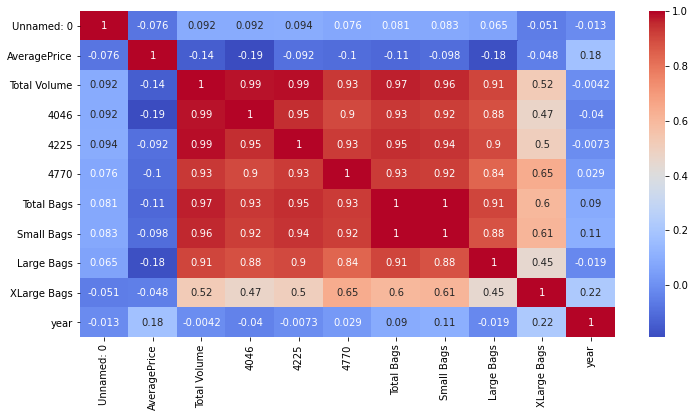

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Observation :
There is a high correlation between pairs:

4046 & total volume (0.98)
4225 & total volume (0.97)
4770 & total volume (0.87)
total bags & total volume (0.96)
small bags & total bags (0.99)
etc

4046 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.


In [108]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [109]:
# Quick sanity check to make sure the column was dropped
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [110]:
# Make sure the columns were converted to int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


#Convert 'Date' column to Pandas date time format


In [111]:
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [114]:
# Confirm the 'Date' column was updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.6+ MB


Now we can start exploring and visualizing our data

In [115]:
# Check how many years of data we're working with
df.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

In [116]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# Comparing total avocados sold from 2015-2016

In [117]:
quantity_per_year = df.groupby('year')['Total Volume'].sum().reset_index()
quantity_per_year

,year,Total Volume
0,2015.0,2.044783e+09
1,2016.0,3.852675e+08


Seems like there is increasing demand for avocados - can we confirm that?



# Comparing total sales within the United States by year

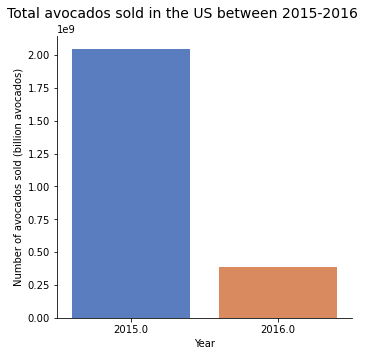

In [118]:
# Let's visualize the total number of avocados sold within the US between 2015 and 2016.

sns.catplot(x="year", y='Total Volume', kind="bar", palette="muted", data=quantity_per_year, height = 5)

plt.xlabel('Year')
plt.ylabel('Number of avocados sold (billion avocados)')
plt.subplots_adjust(top=0.9)
plt.suptitle('Total avocados sold in the US between 2015-2016',  size=14)

plt.show()

Total avocado sales in the US have been on an uptrend from 2015 until 2016 according to our graph. Nonetheless, we can continue exploring what we have!



# Graphing the price distribution

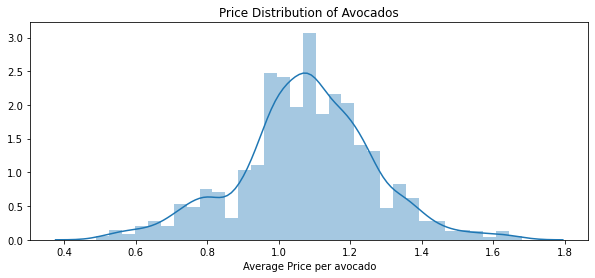

In [119]:
plt.figure(figsize=(10,4))
plt.title("Price Distribution of Avocados")
sns.distplot(df["AveragePrice"])

plt.xlabel('Average Price per avocado')
plt.show()

# Graphing avocado prices 2015-2016

First of all, we'll need to group the average price of avocados by month/year. Luckily, we can easily do this since we've already convered the 'Date' column to 'datetime64' format.

In [120]:
grouped_by_month = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'AveragePrice':'mean'}).reset_index()
grouped_by_month.head()

,Date,AveragePrice
0,2015-01-31,1.039580
1,2015-02-28,1.114487
2,2015-03-31,1.074603
3,2015-04-30,1.069612
4,2015-05-31,1.073944


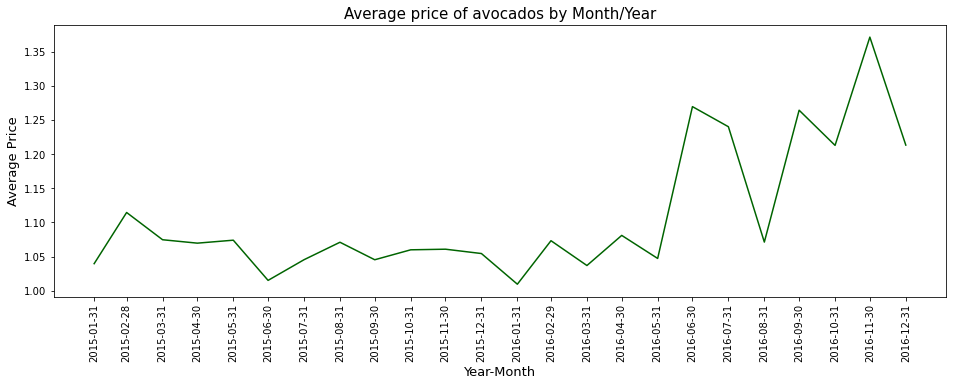

In [121]:
plt.figure(figsize=(16,5))

sns.lineplot(x='Date', y='AveragePrice', data=grouped_by_month, color='darkgreen')

plt.xticks(grouped_by_month.Date) 
plt.xticks(rotation=90)

plt.title('Average price of avocados by Month/Year', size=15)
plt.ylabel('Average Price', size=13)
plt.xlabel('Year-Month', size=13)

plt.show()

In [122]:
price_per_year = df.groupby('year')['AveragePrice'].mean().reset_index()
price_per_year

,year,AveragePrice
0,2015.0,1.060110
1,2016.0,1.151498


The avocado industry suffered a major shortage in 2016 due to a low harvest. The low supply, combined with rapdily growing demand shot up the price of avocados in 2016, which is portrayed by the linegraph as well as the table above.

Comparing total first quarter sales from 2015-2016

In [123]:
volume_3_months = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'Total Volume':'sum'}).reset_index()

# Total sales during the first 3 months of 2015
first_quarter_2015 = volume_3_months.loc[volume_3_months['Date'] < '2015-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2016
first_quarter_2016 = volume_3_months.loc[volume_3_months['Date'] > '2015-12-31']
first_quarter_2016 = first_quarter_2016.loc[first_quarter_2016['Date'] < '2016-4-01'][['Total Volume']].values.sum()

In [124]:
# Create a series using the first quarter sales for 2015-2016

quarter_1_total = [first_quarter_2015, first_quarter_2016]

quarter_1_total_array = np.array([i for i in quarter_1_total])
quarter_1_total_array

first_quarter_volumes = pd.Series(quarter_1_total_array, index=['Q1 - 2015', 'Q1 - 2016'])
first_quarter_volumes = first_quarter_volumes.to_frame().reset_index()
# comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])
first_quarter_volumes.columns = ['Q1 Sales - Year', 'Total Avocados Sold (billion avocados)']
first_quarter_volumes

,Q1 Sales - Year,Total Avocados Sold (billion avocados)
0,Q1 - 2015,5.909052e+08
1,Q1 - 2016,1.183062e+08


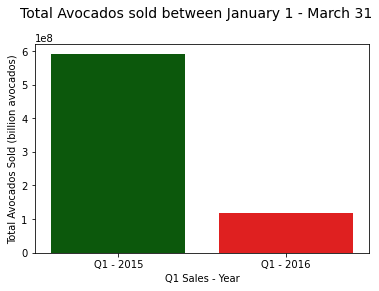

In [125]:
clrs = ['red' if (x < max(quarter_1_total)) else 'darkgreen' for x in quarter_1_total]

q1_plot = sns.barplot(x='Q1 Sales - Year', y='Total Avocados Sold (billion avocados)', data=first_quarter_volumes, palette=clrs)

plt.subplots_adjust(top=0.85)
plt.suptitle('Total Avocados sold between January 1 - March 31', size=14)

plt.show()

# Analyze total sales by region


In [126]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany


In [127]:
sales_by_region = df.groupby('region')['Total Volume'].sum().reset_index()
sales_by_region = sales_by_region.sort_values('Total Volume',ascending=False)

top_10 = sales_by_region[:11]
top_10

,region,Total Volume
48,TotalUS,8.234286e+08
6,California,4.586810e+08
42,SouthCentral,2.143828e+08
49,West,2.006978e+08
26,NewYork,5.997083e+07
14,GreatLakes,5.897445e+07
31,PhoenixTucson,5.661233e+07
2,BaltimoreWashington,5.249687e+07
24,Midsouth,4.239178e+07
27,Northeast,4.159036e+07


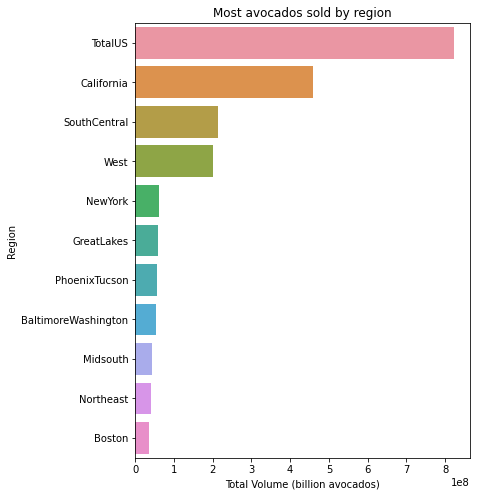

In [128]:
plt.figure(figsize=(6,8))

sns.barplot(x='Total Volume', y='region', orient='h', data=top_10 )

# Let's visualize the total number of avocados sold within the US between 2015 and 2016

plt.title('Most avocados sold by region')
plt.ylabel('Region')
plt.xlabel('Total Volume (billion avocados)')

plt.show()

There are lots of avocado fans out there!



In [129]:
# How many regions are there in total? 
df.region.nunique()

51

In [130]:
# Calculating the total consumption of the top 10 regions
ten_regions_total = top_10['Total Volume'][1:].sum()
ten_regions_total

# Calculating the total consumption of the remaining regions
remaining_regions = sales_by_region[11:]
remaining_regions = remaining_regions['Total Volume'].sum()

# Inputting both in a series
comparison = np.array([ten_regions_total, remaining_regions])
comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])

remaining_regions
comparison

Top 10 regions                 1.220113e+09
Rest of the US (44 regions)    3.865093e+08
dtype: float64